## Alumno : Rubén Álvarez Mosquera

---
# **Aprendizaje Semi-Supervisado**

*Prefacio : Nuestra tarea consiste en entrenar un modelo Semi-Supervisado con el caso del fraude de las tarjetas de crédito*

<< The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.>>

- *Semi-Supervisado*: En los casos que relizamo un entrenamiento Semi-Supervisado, nos referimos que previamente quitaremos las columnas de resultados y entrenaremos el modelo de clusterización sin resultados, para luego comprobar el modelo con los resultados correctos, para ver la efectividad.

---

## Declaración de módulos
---

En primer lugar, vamos a importar algunos módulos comunes. 

También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

También agregaremos una librería (warnings) para evitar los molestos mensajes de advertencia(Futurewarnings).

In [3]:
# Se requiere Python ≥ 3.5
import sys
assert sys.version_info >= (3, 5)

# Se requiere Scikit-Learn ≥ 0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Otros imports
import numpy as np
import os

# Importamos la librería Pandas para administar Dataframes
import pandas as pd

# la línea que sigue, sólo en Colab ...
# %matplotlib inline
# Importamos librería MatPlotLib
import matplotlib as mpl
import matplotlib.pyplot as plt


# Importamos librería "Seaborn" para la visualización que es como un MatPlotLib con "esteriodes"
import seaborn as sns 


# Importa la librería que va a posibilitar evitar que salgan los molestos mensajes de advertencia
import warnings

Configuración de las Advertencias "Futurewarning"

In [4]:
# configuración para eviatar que aparezcan las advertencias "FutureWarnings"
warnings.filterwarnings("ignore", category=FutureWarning)

Configuración de las visualizaciones de "Seaborn"

In [5]:
# tamaño del texto en las etiquetas por defecto para Matplotlib
mpl.rc('axes',  labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)


# Configuramos visualizaciones con Seaborn
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## Importacion de Datos
---

Definimos la función que importará los datos de un archivo CSV a un Dataframe de Pandas

In [6]:
CREDIT_PATH = os.path.join("dataset");

def load_insurance_data(credit_path):
    csv_path = os.path.join(credit_path, "creditcard.csv")
    return pd.read_csv(csv_path)

Llamamos a la función de importación de datos y los importamos a la variable "insurance"

In [7]:
credit = load_insurance_data(CREDIT_PATH)

Comprobamos el estado de los Datos, mediante una revisión de las primeras filas

In [8]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Creamos un archivo backup

In [9]:
credit_backup = credit.copy()

## Revisamos el estado de los datos
---

Revisamos las columnas en general y comprobamos que tenemos :
- La columna "Time" con el tiempo transcurriido en segundos desde la primera operación
- La columna Amount con la cuantía de la transacción
- La columna Binarira "Class" con 1 para los fraudes y 0 para los NoFraudes
- 28 columnas anonimizadas

In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Comprobación del número de NaN por categoría

In [11]:
# De forma global
credit.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Podemos observar que no contiene NaN alguno en el dataset

## Revisamos las columnas

---

### "Time" ------------------------------------------
*Número de identificación del tiempo, que indica los segundos pasados entre cada transacción y la primera transacción del dataset*

In [12]:
credit['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [13]:
credit['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

- Es una variable cuantitativa continua, aunque sus valores parezcan discretos por carecer de decimales
- Observamos que ciertos valores se repiten, por lo que no es de valor único
- No con tiene NaN

### "V1 to V28" ------------------------------------------
*Son columnas que representas "Features", pero que por motivos de confidencialidad , no sabemos lo que significa cada una*

Ejemplo con V1

In [14]:
credit['V1'].describe()

count    2.848070e+05
mean     3.918649e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64

In [15]:
credit['V1'].value_counts()

 2.055797    77
 1.245674    77
 2.053311    62
 1.302378    60
 2.040211    53
             ..
-0.938907     1
 1.375417     1
-3.762431     1
 1.420284     1
-0.533413     1
Name: V1, Length: 275663, dtype: int64

Ejemplo con V20

In [16]:
credit['V20'].describe()

count    2.848070e+05
mean     5.126845e-16
std      7.709250e-01
min     -5.449772e+01
25%     -2.117214e-01
50%     -6.248109e-02
75%      1.330408e-01
max      3.942090e+01
Name: V20, dtype: float64

In [17]:
credit['V20'].value_counts()

-0.180370    77
-0.132080    77
-0.187421    62
 0.005757    60
-0.120714    53
             ..
 0.119238     1
-0.377823     1
-0.729419     1
 0.116184     1
 0.382948     1
Name: V20, Length: 275663, dtype: int64


- Son variables cuantitativas contínuas y que oscilan entre valores negativos a positivos, cercanos a la decena
- No contienen NaN

### "Amount" ------------------------------------------
*Es la cantidad de la transacción*


In [18]:
credit['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


- Son variables cuantitativas contínuas y que oscilan entre 25K y 0
- No contienen NaN

### "Class" ------------------------------------------
*Esto representa una opción binaria, con un 1 si era fraude y un 0 en caso contrario*


In [19]:
credit['Class'].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [20]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- Es una variable cuantitativa discreta con 2 valores
- 1 para los fraudes y 0 para los que no
- No contiene NaN
- Vemos que los fraudes no llegan a los 500 de un total aproximado de 285K

---
---
---

## Estudio de la correlación entre los datos para obtener información relevante
---

### Revisión de los histogramas de las columnas
---

Realizamos una visualización de los histogramas de los datos, que representan el número de veces que un valor aparece, representando la distribución de los casos por categoría para tener una idea de su cantidad, dispersión ,etc...

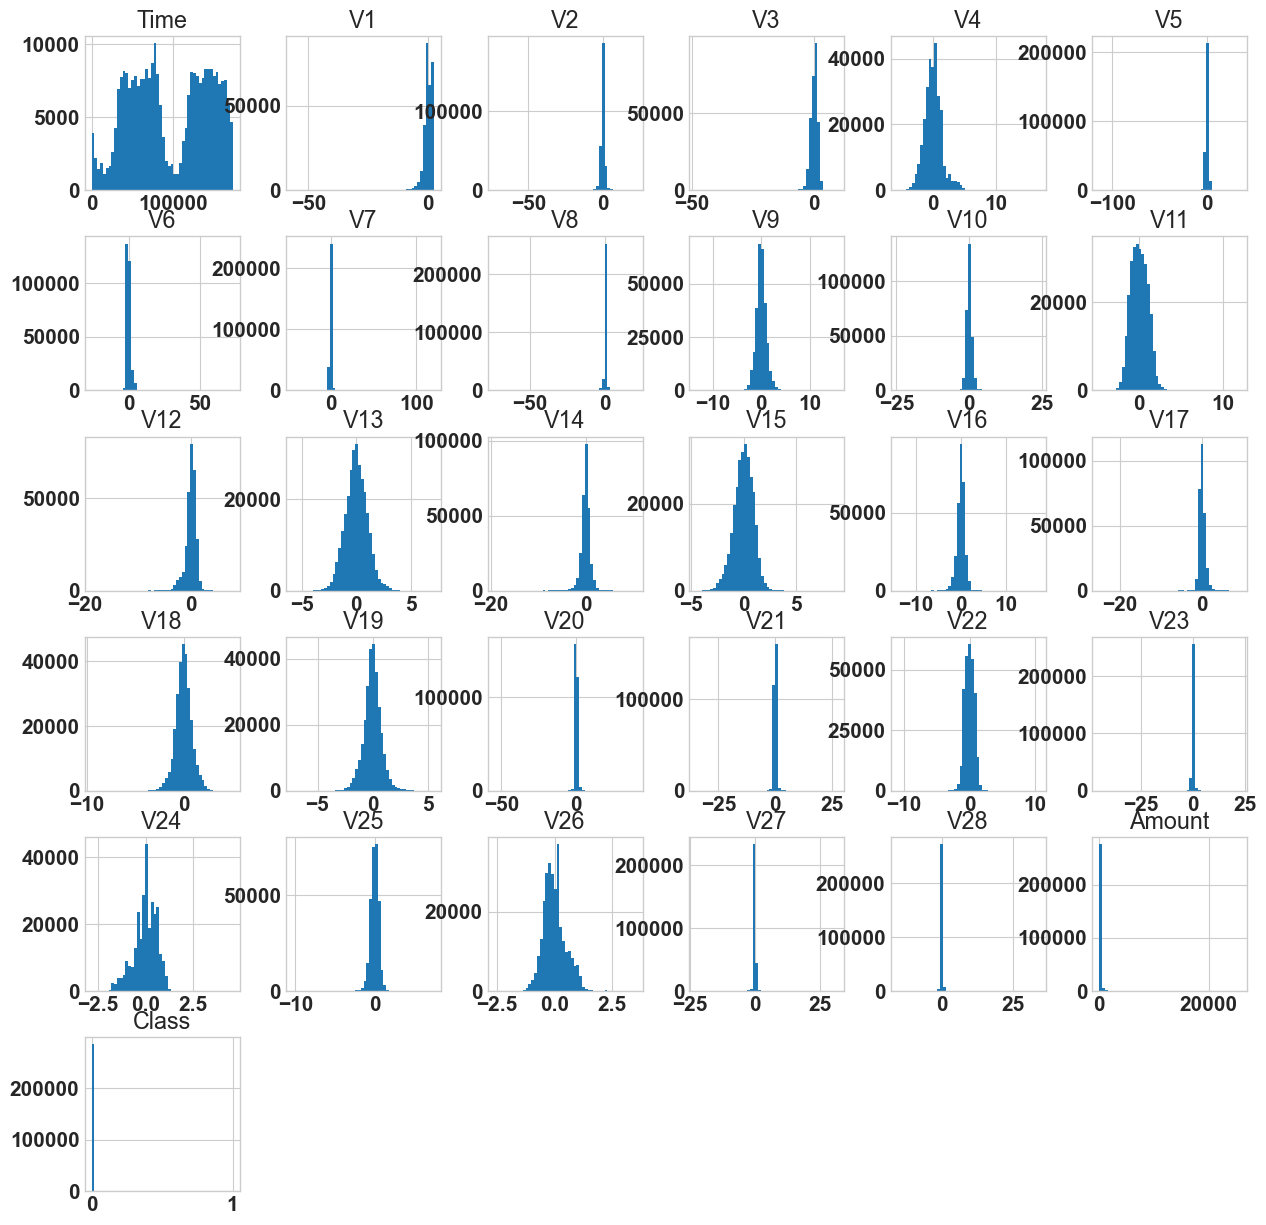

In [21]:
credit.hist(bins=50, figsize =(15,15))
plt.show()

Pasaremos a revisar unos gráficos que nos arrojen algo de luz sobre los datos, para poder sacar alguna conclusión valiosa para este estudio.

### Fraudes:

In [22]:

data = list(credit['Class'].value_counts())
data

[284315, 492]

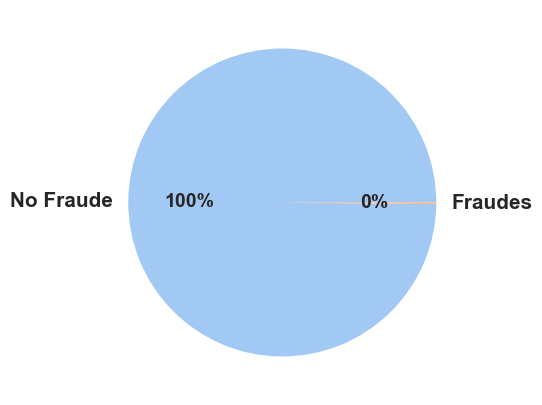

In [23]:
data = list(credit['Class'].value_counts())
labels = ['No Fraude', 'Fraudes']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

- Podemos observar que el porcentaje de fraudes no llega al 1 %, por lo que es un dataset muy poco balanceado

In [24]:
print('No Fraudes', round(credit['Class'].value_counts()[0]/len(credit) * 100,2), '% del dataset')
print('Fraudes', round(credit['Class'].value_counts()[1]/len(credit) * 100,2), '% del dataset')

No Fraudes 99.83 % del dataset
Fraudes 0.17 % del dataset


### Fraudes por tiempo


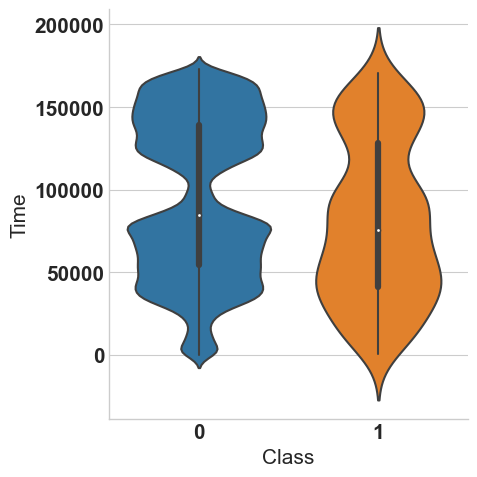

In [25]:
sns.catplot(
    data=credit, x="Class", y="Time",
    kind="violin", split=True,
)

- Com podemos ver, cuando el tiempo ronda los 100K hay una bajada de los No Fraudulentos, mientrea que los fraudulentos no sufren bajadas
- También destacar que los fraudes se producen más frecuentemente en el valor de tiempo 50K, aunque tienen una distribución de minimos y máximos altos
- De hecho podemos observar que a partir de 175K de Tiempo, ya no se producen transacciones correctas, y sin embargo hay fraudulentas ocurriendo

---
---
---

# Buscando correlaciones

Aquí nos damos cuenta de la necesidad de la normalización del modelo para que las correlaciones puedan ser medidas

In [26]:
corr_matrix = credit.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [27]:
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


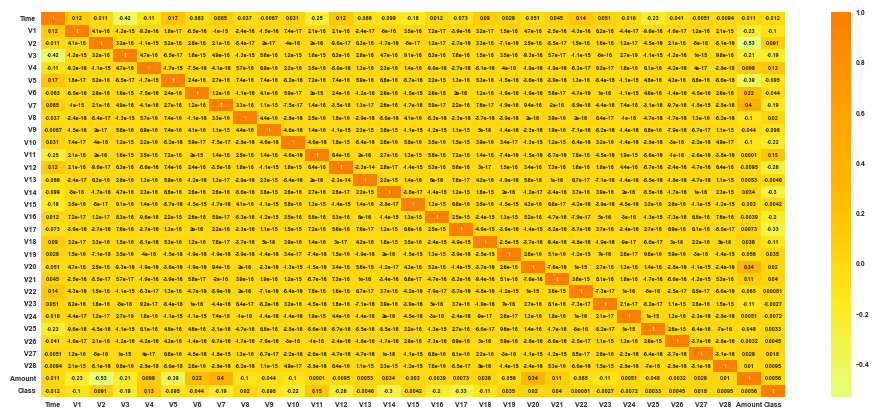

In [28]:
corr_norm = credit.corr()

# Reduciremos el tamaño de fuente para este gráfico (y lo volveremos a dejar como estaba) por el tamaño de celdas
# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=5)
mpl.rc('xtick', labelsize=5)
mpl.rc('ytick', labelsize=5)
plt.rcParams['font.size'] =4
plt.rcParams['figure.figsize'] = [12,5]

sns.heatmap(corr_norm, cmap = 'Wistia', annot= True)

# Volvemos a dejar el tamaño de letras por defecto
mpl.rc('axes',  labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
plt.rcParams['font.size'] =14
plt.rcParams['figure.figsize'] = [8,5]

## Conclusiones preliminares:
- Podemos observar débiles correlaciones lineales entre el fraude y las diferentes variables
    - V11       0.154876
    - V4        0.133447
- Las únicas que tienen correlaciones negativas algo elevadas como en el caso de:
    - V10      -0.216883
    - V12      -0.260593
    - V14      -0.302544
    - V17      -0.326481


---
---
---

# Entrenando modelos de Clustering
---

### Creación del Train Set
---

Primeramente generaremos una semilla de aletoriedad, que normalmente se usa el valor 42, que usaremos para barajar los índices del Dataset a la hora de realizar la división del Dataset de Entrenamiento del de Test

In [29]:
# plantamos una semilla
np.random.seed(42)

### Reducción del dataset a 5.000 registros aprox.
---

Tenemos un dataset con 284807 registros y 31 columnas de variables

In [30]:
credit.shape

(284807, 31)

Nos quedamos con una muestra de 5.000 registros, PERO como la relación que hay entre faudes y No Fraude es tan grande, lo haremos quedándonos con todos los casos de fraude y únicamente con 5.000 casos que no lo sean 

Podemos ver que la dimensión final, nos devuelve 10.492 registros, que corresponden a 5.000 sin fraude, y 492 con fraude

In [31]:
# Tomar la muestra de 10.000 registro sin fraude
no_fraude = credit[credit['Class'] == 0].sample(5000)
# Tomar todos los casos de fraude
fraude = credit[credit['Class'] == 1]

# Generar un dataset juntando los casos anteriores de Fraude y No fraude
# usaremos sample(fran=1) para que las baraje y use todos los registros
# useremos "reset_index" pra que genere un nuevo index con los datos barajados
X_train = no_fraude.append(fraude).sample(frac=1).reset_index(drop=True)
# Reducimos los registros una mustra de 10.000 registros
X_train.shape

(5492, 31)

## Valoración de que columnas conservar
---

- Usamos los valores del dataset, aplicando una separación entre los datos sin resultados, y los resultados
- Dentro de esta división, también probaremos a eliminar las columnas 'Amount' y 'Time' y sus posibles implicaciones si las conservamos

### Conservando 'Amount' y 'Time'
---

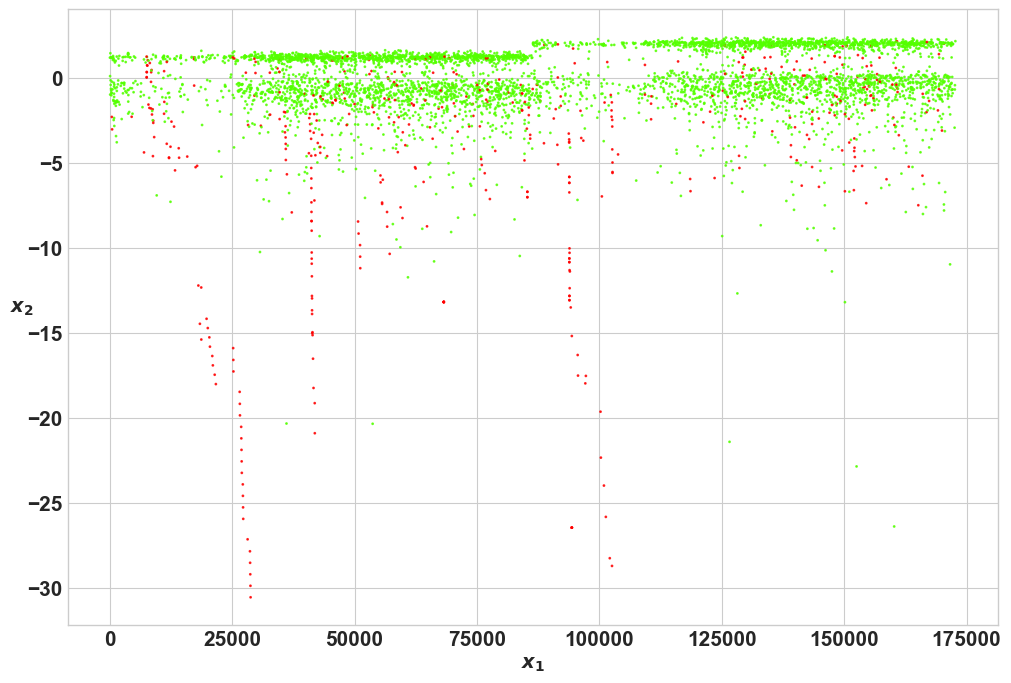

In [32]:
X = X_train.drop(['Class'], axis = 1).values
Y = X_train["Class"].values


# Elegimos los colores del gráfico para luego aplicarlo como parámetro
cmap = plt.get_cmap('prism_r')
# Tamnaño de figura
plt.figure(figsize=(12,8))
# Aplicamos el scatter de puntos
plt.scatter(X[:, 0], X[:, 1], c=Y, s=1, cmap=cmap, alpha=0.8)
# Mostramos etiquetas de abscisas y ordenadas
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
# Mostramos la figura
plt.show()

#### Conclusiones:
- Los datos están demasiado juntos , para poder realizar una clusterización en condiciones

### Conservando 'Time' , sin 'Amount'
---

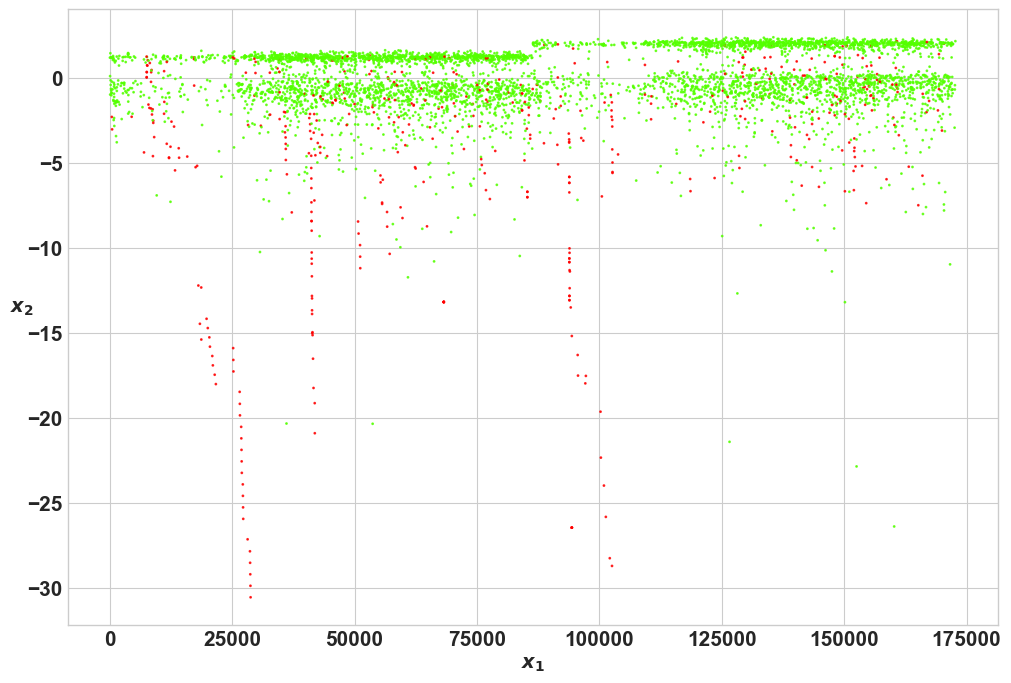

In [33]:
X = X_train.drop(['Class', 'Amount'], axis = 1).values
Y = X_train["Class"].values


# Elegimos los colores del gráfico para luego aplicarlo como parámetro
cmap = plt.get_cmap('prism_r')
# Tamnaño de figura
plt.figure(figsize=(12,8))
# Aplicamos el scatter de puntos
plt.scatter(X[:, 0], X[:, 1], c=Y, s=1, cmap=cmap, alpha=0.8)
# Mostramos etiquetas de abscisas y ordenadas
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
# Mostramos la figura
plt.show()

#### Conclusiones:
- No vemos apenas cambios con la anterior

### Eliminando 'Time' y 'Amount' y quedándonos únicamente con las variableas anonimizadas de V1 a V28

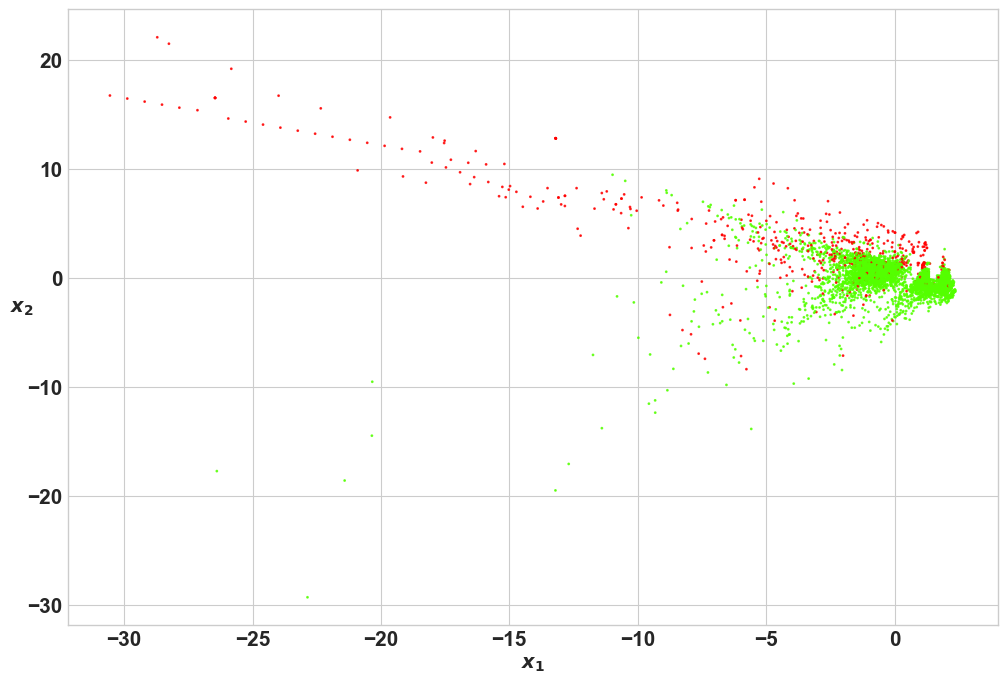

In [34]:
X = X_train.drop(['Class', 'Amount', 'Time'], axis=1).values
Y = X_train["Class"].values

# Elegimos los colores del gráfico para luego aplicarlo como parámetro
cmap = plt.get_cmap('prism_r')
# Tamnaño de figura
plt.figure(figsize=(12,8))
# Aplicamos el scatter de puntos
plt.scatter(X[:, 0], X[:, 1], c=Y, s=1, cmap=cmap, alpha=0.8)
# Mostramos etiquetas de abscisas y ordenadas
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
# Mostramos la figura
plt.show()


#### Conclusiones : 
- Parece que de esta forma los datos son más susceptibles de clusterizar

## Realizaremos una reducción de dimensionalidad
---

- Esto lo hacemos para redsuci r la cantidad de variables, manteniendo la mayor parte de la información importante.

- Esto es muy útil en un ejercicio de Clustering No Supervisado, ya que simplifica el proceso y eficiencia.

- A parte de todo esto, la reducción de dimensionalidad puede ayudar a detectar y mostrar patrones que no se pueden ver con el conjunto de variables que nos proporciona el dataset

- Hay que tener e cuenta de la elección 

#### Tenemos dos principales formas de hacerlo:
- por Proyección (Projection)
    - Que ocasionará una proyección de las variables sobre un plano, reduciendo así la dimensionalidad.
    - Este método usa algoritmos como el análisis de componentes principales (PCA- Principal component analysis), o el análisis discriminante lineal (LDA- Linear discriminant Analysis)
- por Variedad (Mainfold Learning)
    - Que se usa más cuando los datos tienen una distribución no lineal o compleja, y se quiere representar, sin modificar la estructura geométrica original en la nueva proyección de menor dimensión.
    - Este método usa algoritmos no lineales como, t-distributed stochastic neighbor embedding(t-SNE), el iso map, locally linear embedding (LLE), entre otros.

### Aplicación del método de reducción de dimensionalidad PCA con el número adecuado de dimensiones
---


- Hay que tener en cuenta la elección del plano/eje que elegimos para preservar la varianza, y que de todos los que probemos, elijamos el que tenga el mayor valor de varianza, para perder la menor información posible.
- En este dataset tenemos ni más ni menos que 28 dimensiones


- Primeramente tendremos que tener en cuenta el número de dimensiones en las que queremos reducir el Dataset
- En vez de elegirlas nosotros, probaremos con el siguiente código que nos devolverá el número mínimo de dimensiones que preserven un 95% de la varianza con el dataset original

Importamos la librería

In [35]:
from sklearn.decomposition import PCA

Llamamos al método PCA y lo entrenamos con los datos de muestra

In [36]:
# Llamada al método
pca = PCA()
# Entrenamiento del modelo
pca.fit(X)
# Calcular la varianza
cumsum = np.cumsum(pca.explained_variance_ratio_)
# calcular el número de dimensiones adecuado con la menor pérdida de varianza
d = np.argmax(cumsum >= 0.95) +1

Como podemos observar el número mínimo de dimensiones es 18

In [37]:
d

18

Ahora volvemos a llamar al modelo con el parámetro de componentes con varianza mayor de 0.95 (95%)

In [38]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

Observamos de nuevo que las dimensiones son 18

In [39]:
pca.n_components_

18

Comprobamos que la varianza es más del 95%

In [40]:
np.sum(pca.explained_variance_ratio_)

0.9565759543461568

Visualizamos la forma/dimensiones del dataset reducido en dimensionalidad

In [41]:
X_reduced.shape

(5492, 18)

Visionamos la varianza por el número de dimensiones graficamente, para ver que efectivamente 20, es el número adecuado

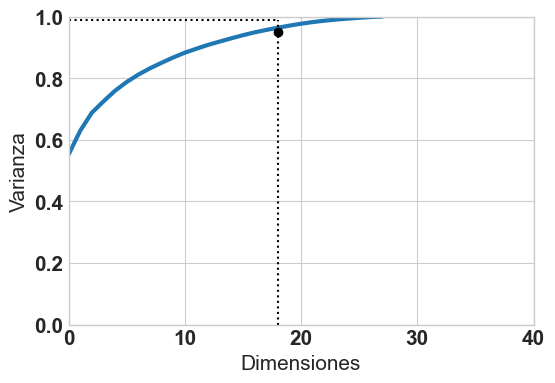

In [42]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 40, 0, 1])
plt.xlabel("Dimensiones")
plt.ylabel("Varianza")
plt.plot([d, d], [0, 0.99], "k:")
plt.plot([0, d], [0.99, 0.99], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

Visionamos la distribución de los registros

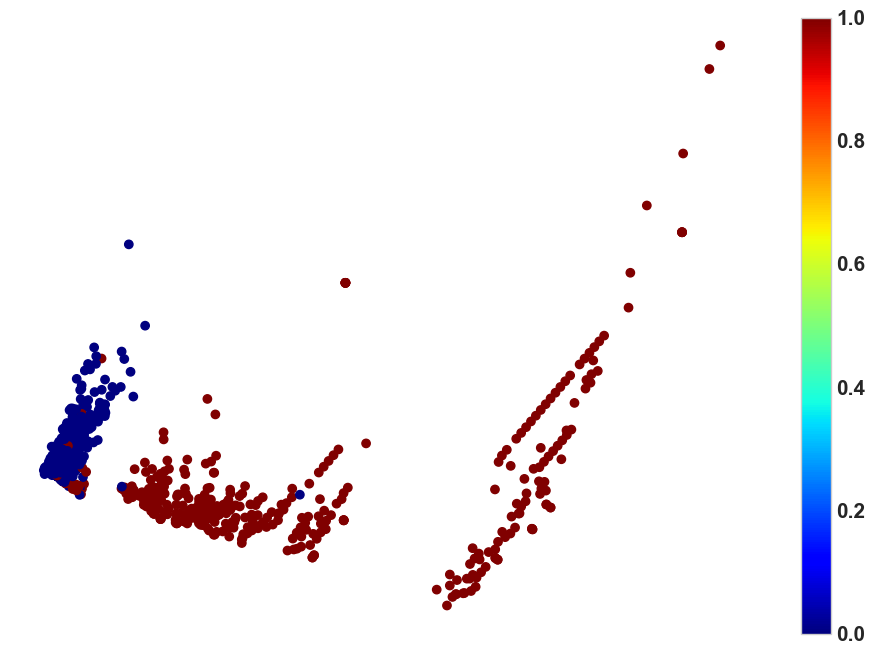

In [43]:
plt.figure(figsize=(12,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

### Conclusiones:
- Podemos observar :
    - En AZUL los casos que No son fraude
    - En ROJO los casos de fraude
- También observamos que tenemos 2 clusters completamente rojos, por lo que podríamos inferir el fraude en esos casos.

### Visionado de los casos de fraude y No fraude con K-Means:
---

Importamos librería

In [44]:
from sklearn.cluster import KMeans

Llamamos y entrenamos el modelo

In [45]:
kmeans = KMeans(n_clusters=2, random_state=42)
X_kmeans = kmeans.fit_transform(X_reduced)

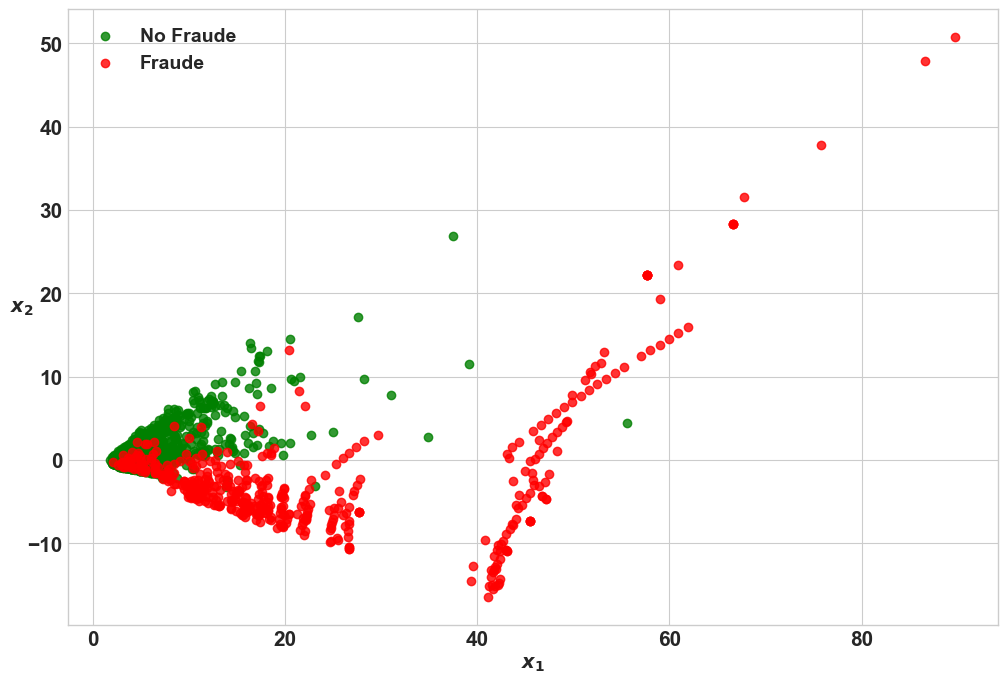

In [47]:
plt.figure(figsize=(12, 8))
plt.scatter(X_kmeans[np.where(Y == 0), 0], X_reduced[np.where(Y == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='No Fraude')
plt.scatter(X_kmeans[np.where(Y == 1), 0], X_reduced[np.where(Y == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraude')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.legend(loc='best')
plt.show()

#### Conclusiones:
- Podemos observar :
    - En VERDE los casos que No son fraude
    - En ROJO los casos de fraude
- En este caso también podemos ver dos grupos que se podrían clusterizar, pero no están lo suficientemente claros

### Visionado de los casos de fraude y No fraude con el método t-distributed stochastic neighbor embedding(t-SNE):
---

Importamos librerías

In [48]:
from sklearn.manifold import TSNE

Entrenamos el modelo de clusterización TSNE

In [49]:
# Llamamos al modelo TSNE con RandomSeed=42 y dos componentes 0 y 1 de fraude
tsne = TSNE(n_components=2, random_state=42)
# Entrenamos al modelo con los datos de X
X_tsne = tsne.fit_transform(X_reduced)

Visualizamos los resultados 

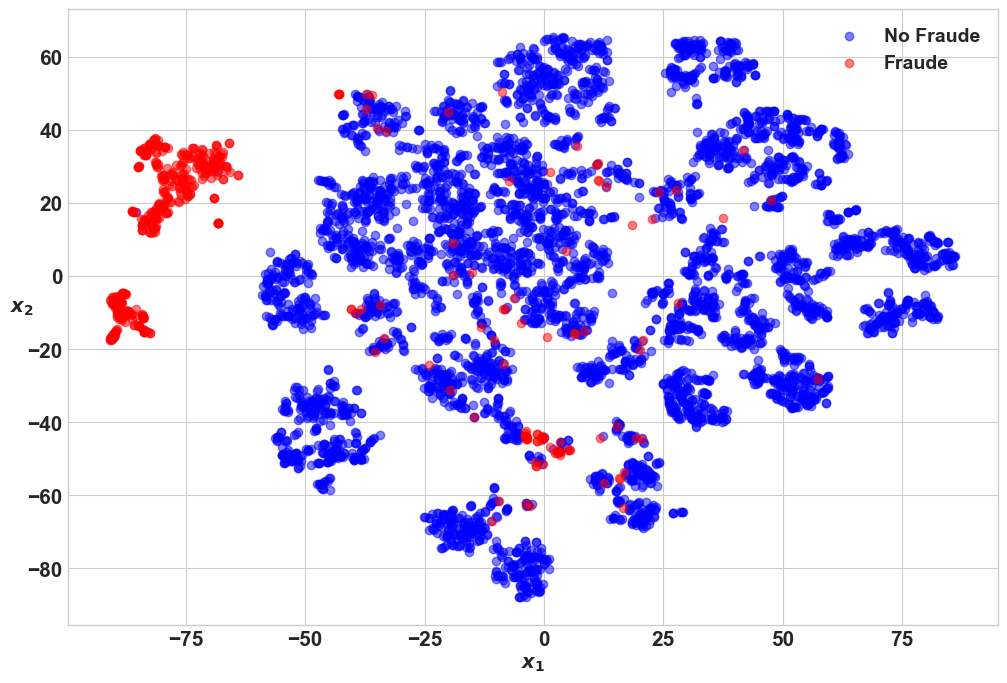

In [50]:
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[np.where(Y == 0), 0], X_tsne[np.where(Y == 0), 1], marker='o', color='b', linewidth=1, alpha=0.5, label='No Fraude')
plt.scatter(X_tsne[np.where(Y == 1), 0], X_tsne[np.where(Y == 1), 1], marker='o', color='r', linewidth=1, alpha=0.5, label='Fraude')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.legend(loc='best')
plt.show()

### Conclusiones:
- Podemos observar :
    - En AZUL los casos que No son fraude
    - En ROJO los casos de fraude
- También observamos que tenemos 2 clusters completamente rojos, por lo que podríamos inferir el fraude en esos casos.

---
---
---


### Uso de DBSCAN como método de agrupación:
- Usaremos esta herramienta para realizar una agrupación
- DBSCAN puede ser usado para clasificar nuevos datos, pero para hacerlo se apoya en un clasificador externo (así podemos elegir cual queremos y no depender de uno concreto; este hecho explica porque DBSAN no tiene el método predict).
- Lo haremos desde el resultado de t-SNE, ya que es la que muestra los datos más claramente clusterizables

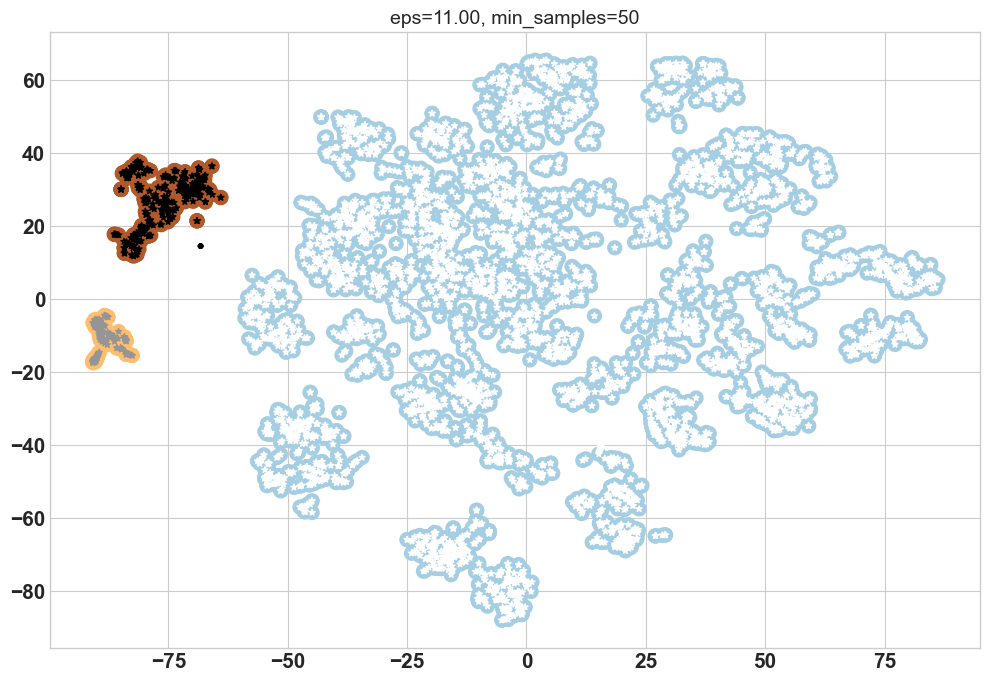

In [51]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=11,min_samples=50)
dbscan.fit(X_tsne)

def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)



plt.figure(figsize=(12,8))
           
plot_dbscan(dbscan, X_tsne, size= 100)

plt.show()

#### Conclusiones:
- Podemos observar que aunque es bastante efectiva la agrupación que nos proporciona DBSCAN, no es lo suficientemente aclaratoria, ya que nos interpreta grupos que en realidad deberían pertenecer al mismo grupo de fraude

---
---
---

### Usando KNeighborsClassifier
- Vamos a entrenar este clasificador con las instancias núcleo, sólo con ellas. Por que son las representativas de las densidades de los datos.

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,
        dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [54]:
X_new = np.array([[-5,0],[0,5]])
knn.predict(X_new)

array([0, 0], dtype=int64)

In [55]:
knn.predict_proba(X_new)

array([[1., 0., 0.],
       [1., 0., 0.]])

In [56]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

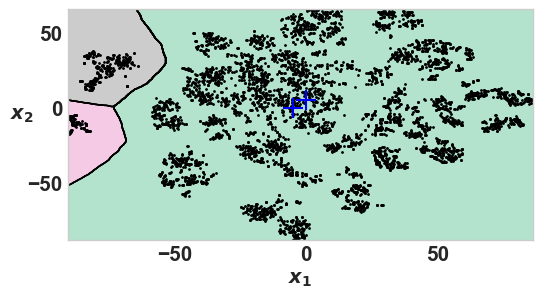

In [57]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X_tsne, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

#### Conclusiones:
- Podemos observar que efectivamente, sigue detectando un grupo de NO FRaude en Verde correctamente.
- Asi mismo también detecta una separación entre los grupos rosa y gris , y en realidad pertenecen al mismo grupo de "fraude"

---
---
---

## Clasificador lineal simple

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

clf = LogisticRegression(solver="lbfgs").fit(X, Y)
pred_y = clf.predict(X)

print ("")
print ("Classification Report: ")
print (classification_report(Y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(Y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5000
           1       0.98      0.86      0.91       492

    accuracy                           0.99      5492
   macro avg       0.98      0.93      0.95      5492
weighted avg       0.99      0.99      0.99      5492


Accuracy Score:  0.9856154406409323


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

clf = LogisticRegression(solver="lbfgs").fit(X_tsne , Y)
pred_y = clf.predict(X_tsne)

print ("")
print ("Classification Report: ")
print (classification_report(Y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(Y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5000
           1       0.99      0.79      0.88       492

    accuracy                           0.98      5492
   macro avg       0.99      0.89      0.93      5492
weighted avg       0.98      0.98      0.98      5492


Accuracy Score:  0.9806991988346686


---
---
---

## Mezclas Gaussianas
---

In [60]:
from sklearn.mixture import GaussianMixture

In [76]:
gm = GaussianMixture(n_components=2,n_init=10, random_state=42)
gm.fit(X_reduced)

GaussianMixture(n_components=2, n_init=10, random_state=42)

In [77]:
gm.weights_

array([0.78834829, 0.21165171])

In [78]:
gm.means_

array([[-1.81549541e+00, -1.22733464e-01, -3.77661226e-02,
        -1.30184977e-01, -3.85918558e-01,  6.20306743e-02,
        -3.66819437e-02, -1.52161325e-02,  6.31080226e-02,
        -6.27187435e-02, -2.89011120e-02, -4.98624902e-02,
        -4.37455506e-02, -2.88896154e-02, -1.78574468e-03,
        -3.67515508e-02, -5.19354366e-03,  3.48458937e-03],
       [ 6.76225436e+00,  4.57150650e-01,  1.40669112e-01,
         4.84905620e-01,  1.43744756e+00, -2.31048339e-01,
         1.36630824e-01,  5.66761876e-02, -2.35061185e-01,
         2.33611220e-01,  1.07649224e-01,  1.85724977e-01,
         1.62940947e-01,  1.07606402e-01,  6.65144056e-03,
         1.36890093e-01,  1.93446170e-02, -1.29792009e-02]])

In [79]:
gm.covariances_

array([[[ 9.61638944e-02,  4.61188266e-02, -3.73748941e-02,
          2.25907829e-01,  9.48649723e-02, -3.06650318e-02,
         -1.31219641e-01, -7.21776040e-03,  1.35396257e-02,
          2.41077865e-02,  5.43222887e-02, -3.53663859e-02,
         -5.99400511e-02, -3.45767483e-02, -9.92572716e-04,
         -5.03539820e-02,  9.78427166e-03, -1.96752532e-02],
        [ 4.61188266e-02,  2.77609908e-01, -2.67580098e-01,
         -2.67737398e-01,  2.90467388e-01, -2.89303127e-01,
         -1.78365186e-01, -2.11010261e-01, -1.10839020e-01,
          8.88529545e-02, -5.86292294e-02, -9.03091947e-02,
         -5.35549206e-02, -3.43096093e-02,  2.79707392e-02,
         -5.61976942e-02,  7.06674559e-03, -5.18784104e-02],
        [-3.73748941e-02, -2.67580098e-01,  2.86522941e-01,
          3.01453103e-01, -1.94337153e-01,  2.00411929e-01,
          3.80704597e-02,  1.94640779e-01,  6.97660980e-02,
         -1.22598871e-01,  8.79084024e-02,  1.01094659e-01,
          3.62959821e-02, -3.74200324e

In [80]:
gm.converged_

True

In [81]:
gm.n_iter_

13

In [82]:
gm.predict(X_reduced)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [83]:
gm.predict_proba(X_reduced)

array([[3.72271511e-065, 1.00000000e+000],
       [1.00000000e+000, 1.30993489e-013],
       [1.00000000e+000, 1.52383825e-011],
       ...,
       [1.00000000e+000, 1.84824601e-011],
       [3.55304894e-224, 1.00000000e+000],
       [1.00000000e+000, 1.91961910e-011]])

In [84]:
X_new, y_new = gm.sample(6)
X_new

array([[-1.97561356e+00,  2.45225748e-01, -4.55707267e-01,
        -6.48603647e-01, -4.90374973e-01, -2.01160611e+00,
        -7.88549235e-01, -1.40526196e+00,  6.40852988e-01,
         4.37819158e-01, -2.36070374e-02, -5.04088428e-01,
        -3.33223364e-01,  1.36870934e+00, -7.97706026e-01,
        -2.31000310e-01,  1.65494777e+00,  1.28257111e+00],
       [-2.03123677e+00, -6.76082592e-01,  3.53152323e-01,
        -8.83273277e-03, -2.62763612e+00,  1.94632053e+00,
         2.71553841e+00,  8.67579857e-01, -9.29265137e-02,
        -1.07437258e+00,  2.69985852e-01,  5.78377818e-01,
        -1.26820713e-01,  9.84546483e-01,  8.20983989e-01,
         7.74514750e-01,  8.38546761e-01,  1.34309639e-02],
       [-2.20740278e+00, -1.49444203e-01, -2.16772340e-01,
        -1.59098281e+00, -8.92331282e-02,  7.55637958e-01,
         2.10419780e-01,  1.55518376e+00, -6.83215279e-01,
        -9.76439720e-01, -1.43493400e+00, -7.05312306e-01,
         6.93882357e-01,  1.40478652e+00, -8.77117235e

In [85]:
y_new

array([0, 0, 0, 0, 0, 1])

In [86]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors='r');
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [87]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X_reduced)
plt.show()

ValueError: X has 2 features, but GaussianMixture is expecting 18 features as input.

<Figure size 800x400 with 0 Axes>

In [75]:
X_reduced.shape

(5492, 18)

Puede imponer restricciones a las matrices de covarianza que busca el algoritmo estableciendo el hiperparámetro `covariance_type`:
* "**full**" (por defecto): sin restricciones, todos los conglomerados pueden tener forma elipsoidal de cualquier tamaño.
* "**tied**": Todos los conglomerados deben tener la misma forma, que puede ser cualquier elipsoide (es decir, todos comparten la misma matriz de covarianza).
* "**spherical**": todos los conglomerados deben ser esféricos, pero pueden tener diámetros diferentes (es decir, varianzas diferentes).
* "**diag**": los conglomerados pueden tener cualquier forma elipsoidal de cualquier tamaño, pero los ejes del elipsoide deben ser paralelos a los ejes (es decir, las matrices de covarianza deben ser diagonales).


In [88]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X_reduced)
gm_tied.fit(X_reduced)
gm_spherical.fit(X_reduced)
gm_diag.fit(X_reduced)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [89]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)


ValueError: X has 2 features, but GaussianMixture is expecting 18 features as input.

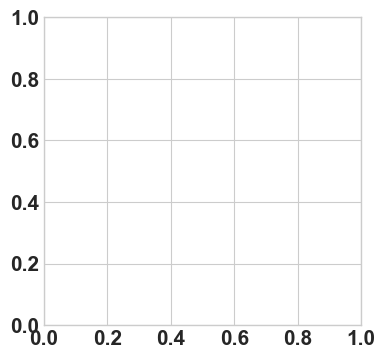

In [90]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X_reduced)
plt.show()


---
---
---

## Detección de anomalías mediante mezclas gaussianas

Las mezclas gaussianas pueden utilizarse para la _detección de anomalías_: las instancias situadas en regiones de baja densidad pueden considerarse anomalías. Debe definir qué umbral de densidad desea utilizar. Por ejemplo, en una empresa de fabricación que intenta detectar productos defectuosos, la proporción de productos defectuosos suele ser bien conocida. Digamos que es igual a 4%, entonces puede establecer el umbral de densidad para que sea el valor que resulta en tener 4% de las instancias localizadas en áreas por debajo de ese umbral de densidad:

In [91]:
densities = gm.score_samples(X_reduced)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [92]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X_reduced)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)
plt.show()

ValueError: X has 2 features, but GaussianMixture is expecting 18 features as input.

<Figure size 800x400 with 0 Axes>

---
---

## Selección del número de clusters

No podemos utilizar la **inercia** o la **puntuación de silueta** porque ambas suponen que los clusters son esféricos. En su lugar, podemos intentar encontrar el modelo que minimice un criterio de información teórico como el **Criterio de Información Bayesiano** (**BIC**) o el **Criterio de Información de Akaike** (**AIC**):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ es el número de instancias.
* $p$ es el número de parámetros aprendidos por el modelo.
* $L$ es el valor maximizado de la función de verosimilitud del modelo. Es la probabilidad condicional de los datos observados $\mathbf{X}$, dado el modelo y sus parámetros optimizados.

Tanto el **BIC** como el **AIC** penalizan los modelos que tienen más parámetros que aprender (por ejemplo, más clusters), y recompensan los modelos que se ajustan bien a los datos (es decir, los modelos que dan una alta verosimilitud a los datos observados).

In [93]:
gm.bic(X_reduced)

201643.98940725304

In [94]:
gm.aic(X_reduced)

199138.40230360255

In [96]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X_reduced)
             for k in range(1, 11)]

In [97]:
bics = [model.bic(X_reduced) for model in gms_per_k]
aics = [model.aic(X_reduced) for model in gms_per_k]

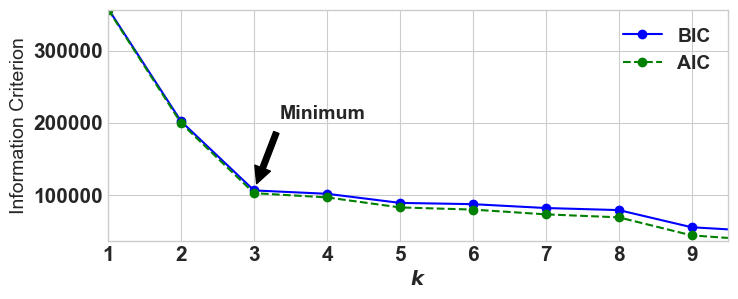

In [98]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

Vamos a buscar la mejor combinación de valores tanto para el número de clusters como para el hiperparámetro "covarianze_type":

In [99]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10, covariance_type=covariance_type, random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [100]:
best_k

9

In [101]:
best_covariance_type

'full'

---
---

## Modelos bayesianos de mezclas gaussianas

En lugar de buscar manualmente el número óptimo de clusters, es posible utilizar en su lugar la clase `BayesianGaussianMixture` que es capaz de dar pesos iguales (o cercanos) a cero a los clusters innecesarios. Basta con establecer el número de componentes en un valor que considere superior al número óptimo de clusters, y el algoritmo eliminará automáticamente aquellos innecesarios.

In [102]:
from sklearn.mixture import BayesianGaussianMixture

In [104]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_reduced)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [105]:
bgm.weights_

array([0.07372395, 0.01382951, 0.06449658, 0.00345684, 0.39257973,
       0.25772744, 0.03349614, 0.10278366, 0.00397946, 0.05392668])

Si redondeamos con dos dígitos, el algoritmo detectó automáticamente que sólo se necesitan 3 componentes:

In [106]:
np.round(bgm.weights_, 2)

array([0.07, 0.01, 0.06, 0.  , 0.39, 0.26, 0.03, 0.1 , 0.  , 0.05])

In [107]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

ValueError: X has 2 features, but BayesianGaussianMixture is expecting 18 features as input.

<Figure size 800x500 with 0 Axes>

In [109]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_reduced)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

ValueError: X has 2 features, but BayesianGaussianMixture is expecting 18 features as input.

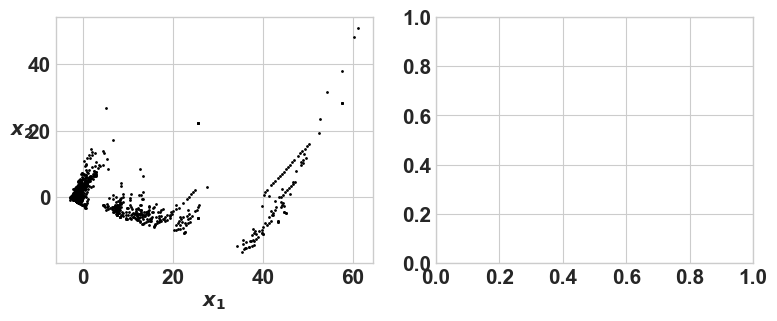

In [110]:
plt.figure(figsize=(9, 3.2))
plt.subplot(121)
plot_data(X_reduced)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.subplot(122)
plot_gaussian_mixture(bgm, X_reduced, show_ylabels=False)
plt.show()

No muy bien... en lugar de detectar 2 conglomerados con forma de luna, el algoritmo detectó 8 conglomerados elipsoidales. Sin embargo, el gráfico de densidad no tiene tan mal aspecto, 
así que podría servir para detectar anomalías.

---
---
---